In [1]:
from multistrand.objects import *
from multistrand.options import Options, EnergyType
from multistrand.system import *

In [2]:
def print_trajectory(o):
    print(o.full_trajectory[0][0][3])   # the strand sequence
    print(o.start_state[0].structure)   # the starting structure
    for i in range(len(o.full_trajectory)):
        time = o.full_trajectory_times[i]
        state = o.full_trajectory[i][0]
        struct = state[4]
        dG = state[5]
        print(f'{struct} t={time:11.9f} seconds, dG={dG:6.2f} kcal/mol')

In [3]:
c = Complex(strands=[Strand(name="hairpin", sequence="GTTCGGGCAAAAGCCCGAAC")],
            structure= 20*'.')

In [4]:
o = Options(temperature=25.0,
            dangles='Some',
            start_state=[c],
            simulation_time=5e-6,  # 5 microsecond
            num_simulations=1,  # don't play it again, Sam
            output_interval=1,  # record every single step
            simulation_mode='Trajectory')
o.DNA23Metropolis()

In [5]:
print(f"k_uni = {o.unimolecular_scaling:g} /s, k_bi = {o.bimolecular_scaling:g} /M/s")
# you can also set them to other values if you want

k_uni = 2.41687e+06 /s, k_bi = 801171 /M/s


In [6]:
s = SimSystem(o)
s.start()

In [7]:
print_trajectory(o)

GTTCGGGCAAAAGCCCGAAC
....................
.................... t=0.000000000 seconds, dG=  0.00 kcal/mol
.....(.......)...... t=0.000000604 seconds, dG=  1.88 kcal/mol
...(.(.......)..)... t=0.000000867 seconds, dG=  1.72 kcal/mol
...(((.......)).)... t=0.000000877 seconds, dG=  0.56 kcal/mol
..((((.......)).)).. t=0.000001076 seconds, dG=  0.57 kcal/mol
...(((.......)).)... t=0.000001296 seconds, dG=  0.56 kcal/mol
..((((.......)).)).. t=0.000001524 seconds, dG=  0.57 kcal/mol
.(((((.......)).))). t=0.000001586 seconds, dG=  0.29 kcal/mol
((((((.......)).)))) t=0.000001886 seconds, dG= -2.31 kcal/mol
((((.(.......)..)))) t=0.000002768 seconds, dG= -1.14 kcal/mol
((((((.......).))))) t=0.000002982 seconds, dG= -2.31 kcal/mol
(((((..........))))) t=0.000003535 seconds, dG= -4.14 kcal/mol
((((((........)))))) t=0.000003932 seconds, dG= -6.22 kcal/mol
(((((((......))))))) t=0.000004083 seconds, dG= -8.58 kcal/mol
((((((((....)))))))) t=0.000005198 seconds, dG=-10.37 kcal/mol


In [8]:
def myplot():
    import matplotlib
    import matplotlib.pylab as plt

    times = o.full_trajectory_times
    states = o.full_trajectory
    energies = [s[0][5] for s in states]
    # you can examine 'states' to see what other useful information is there

    plt.figure(1)
    plt.plot(times, energies,'go', times, energies,'g-')
    plt.title("Energy landscape for simulated hairpin folding trajectory")
    plt.xlabel("Time (seconds)", fontsize='larger')
    plt.ylabel("Microstate Energy (kcal/mol)", fontsize='larger')
    plt.yticks(fontsize='larger', va='bottom')
    plt.xticks(fontsize='larger')
    plt.show()

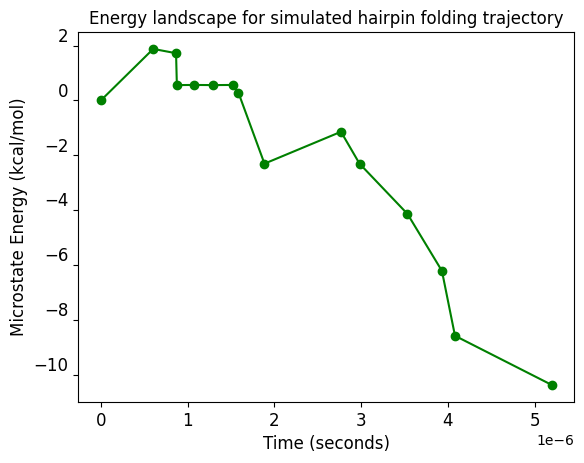

In [9]:
myplot() 